# Lesson 3 Assignment

In this lesson you were shown how to build a model using both Linear and Polynomial Regression. Using this knowledge, find a dataset or use one of Scikit-learn's built-in sets to build a fresh model. Explain in your notebook why you chose the technique you did, and demonstrate your model's accuracy. If it is not accurate, explain why.

## Building a Linear Regression Model using Scikit-Learn Diabetes Data

### Diabetes Data

This dataset contains information about diabetes patients, including various medical measurements and a target variable indicating the progression of the disease. For more details, let's import the data from scikit learn and check for its description using DESCR attribute.

In [11]:
from sklearn.datasets import load_diabetes

# Load the Diabetes dataset
diabetes = load_diabetes( )



In [5]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## Analyzing the Diabetes data


To analyze the Diabetes data, we need to laod the data into a pandas dataframe for easy data manipulation and analysis.

In [18]:
# Create a pandas DataFrame for easy data manipulation
import pandas as pd
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

In [19]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


We can then add the target variable into the DataFrame

In [20]:
# Add the target variable to the DataFrame
diabetes_df['target'] = diabetes.target


In [21]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### Checking for missing values

Missing data affects the accuracy of data analysis and model performance. First we check if there is missing data in the current dataframe:

In [23]:
diabetes_df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

There is no any missing data in the DataFrame. And so we can move further to visualize and uncover the relationship between the data and the target variable

### Visualizations

Part of the data scientist's role is to demonstrate the quality and nature of the data they are working with. To do this, they often create interesting visualizations, or plots, graphs, and charts, showing different aspects of data. In this way, they are able to visually show relationships and gaps that are otherwise hard to uncover.


Visualizations can also help determine the machine learning technique most appropriate for the data. A scatterplot that seems to follow a line, for example, indicates that the data is a good candidate for a linear regression exercise.



One data visualization library that works well in Jupyter notebooks is Matplotlib. Let's try to create some basic plots to display the new dataframe we just created. What would a basic line plot show?

In [24]:
import matplotlib.pyplot as plt

Let's check if there are some relationships between age and diabetes progression (target) using scatter plot

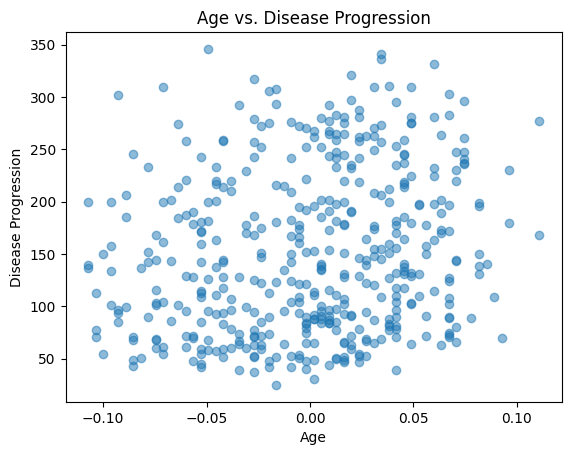

In [25]:
plt.scatter(diabetes_df['age'], diabetes_df['target'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Disease Progression')
plt.title('Age vs. Disease Progression')
plt.show()

Does this make sense? Not really! Let's use barchart and see if we can uncover something

#### Make it useful
To get charts to display useful data, you usually need to group the data somehow. Let's try creating a plot where the y axis shows the disease progression and the data demonstrates the distribution of data.

Add a cell to create a grouped bar chart:

Text(0, 0.5, 'Disease progression')

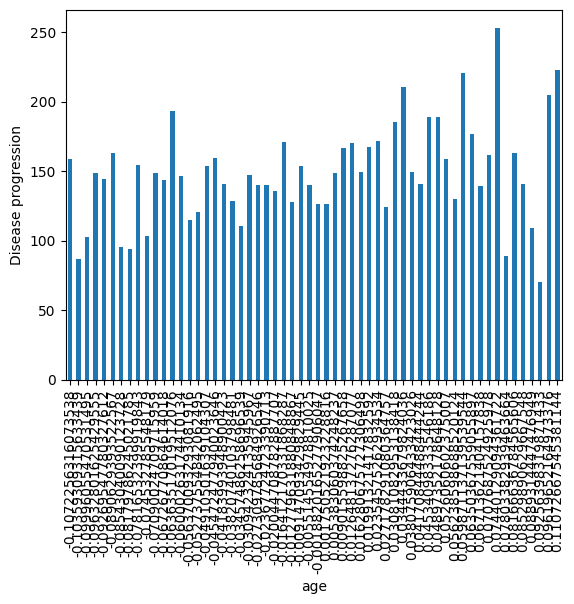

In [26]:
diabetes_df.groupby(['age'])['target'].mean().plot(kind='bar')
plt.ylabel("Disease progression")

Looking at the barchart suggests that there should be some correlation, and we can try training linear regression model to predict the relationship between age and disease progression (target).

Let's see if there is a correlation using the corr function. But before that, here's a general guideline for interpreting correlation coefficients:



Close to 1: A correlation coefficient close to 1 (positive or negative) indicates a strong correlation between the variables. As the absolute value approaches 1, the strength of the correlation increases.

Close to 0: A correlation coefficient close to 0 suggests a weak or no linear relationship between the variables. In this case, the variables are considered to be less correlated.

Between 0 and 1: A correlation coefficient between 0 and 1 (positive or negative) indicates a moderate correlation. The closer the coefficient is to 1 or -1, the stronger the correlation.

In [29]:
print(diabetes_df['age'].corr(diabetes_df['target']))

0.18788875071891983


A  correlation value of 0.1 indicatesthere is some degree  correlation between the age and disease progression. Which means that training a predictive model makes sense.

## Simple Linear Regression
To train our Linear Regression model, we will use the Scikit-learn library.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [37]:
import numpy as np

We start by separating input values (features) and the expected output (label) into separate numpy arrays:

In [31]:
X = diabetes_df['age'].to_numpy().reshape(-1,1)
y = diabetes_df['target']

Note that we had to perform reshape on the input data in order for the Linear Regression package to understand it correctly. Linear Regression expects a 2D-array as an input, where each row of the array corresponds to a vector of input features. In our case, since we have only one input - we need an array with shape N×1, where N is the dataset size.

Then, we need to split the data into train and test datasets, so that we can validate our model after training:

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Finally, training the actual Linear Regression model takes only two lines of code. We define the LinearRegression object, and fit it to our data using the fit method:

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

To see how accurate our model is, we can predict disease progression on a test dataset, and then measure how close our predictions are to the expected values. This can be done using mean square error (MSE) metrics, which is the mean of all squared differences between expected and predicted value.

In [38]:
pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 70.4 (46.8%)


Our error seems to be around  ~46%. Very. Another indicator of model quality is the coefficient of determination, which can be obtained like this

In [39]:
score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Model determination:  0.03523481793947314


If the value is 0, it means that the model does not take input data into account, and acts as the worst linear predictor, which is simply a mean value of the result. The value of 1 means that we can perfectly predict all expected outputs. In our case, the coefficient is around 0.04, which is quite low.

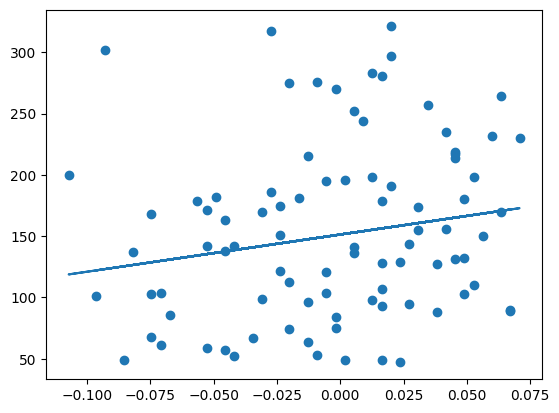

In [40]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

## Final note

Our model may have poor performance simply because we selected only one feature (age) out of the 10 input features. The model performance can be improved by taking all the features that have predictive value into account.